In [7]:
import os

import pandas as pd
import torch

# path
base_dir = "data/compare/esm"
# compare data source
subdirs = ["Nature", "P450Diff2", "P450Diffusion"]

read data

In [8]:
all_data = []

for subdir in subdirs:
    folder_path = os.path.join(base_dir, subdir)
    if not os.path.isdir(folder_path):
        continue

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".pt"):
            file_path = os.path.join(folder_path, file_name)
            try:
                data = torch.load(file_path)
                all_data.append(
                    {
                        "source": subdir,
                        "filename": file_name,
                        "ESM": data["mean_representations"][33].tolist(),
                    }
                )

            except Exception as e:
                print(f"{file_path} :{e}")

In [9]:
df = pd.DataFrame(all_data)

1280->2

In [10]:
import numpy as np
from sklearn.manifold import TSNE

In [11]:
X = np.array(df["ESM"].tolist())

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
df["tsne"] = list(X_tsne)
df[["tsne_1", "tsne_2"]] = pd.DataFrame(X_tsne, index=df.index)

draw

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

In [13]:
dfR = df.iloc[::-1].reset_index(drop=True)

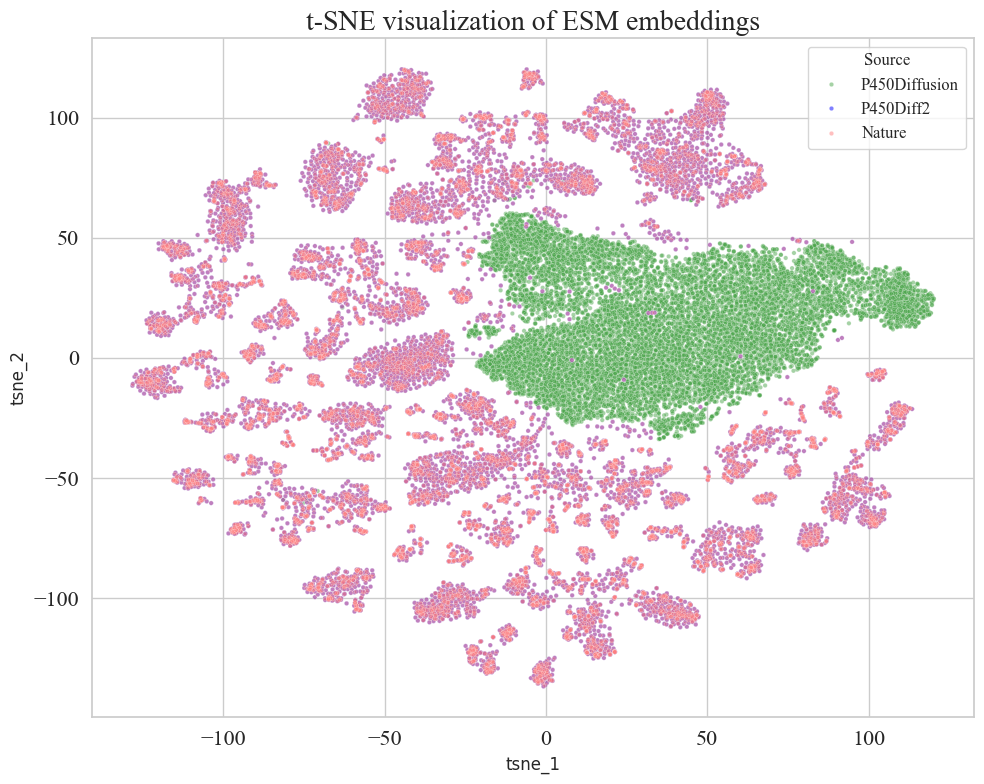

In [16]:
FONT_PATH = "data/font/Times New Roman.ttf"
font_prop = font_manager.FontProperties(fname=FONT_PATH)


custom_palette = {"Nature": "#ff8080", "P450Diff2": "blue", "P450Diffusion": "#4ca64c"}

# 设置画图风格
sns.set(style="whitegrid", context="notebook")

# 创建图形
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=dfR,
    x="tsne_1",
    y="tsne_2",
    hue="source",
    palette=custom_palette,
    alpha=0.5,
    s=10,
)

plt.title(
    "t-SNE visualization of ESM embeddings",
    fontproperties=font_prop,
    fontsize=20,
)
plt.xticks(fontproperties=font_prop, fontsize=16)
plt.yticks(fontproperties=font_prop, fontsize=16)
plt.legend(
    title="Source",
    loc="best",
    prop=font_prop,
    fontsize=16,
    title_fontproperties=font_prop,
)
plt.tight_layout()
plt.savefig("data/pic/esm_tsne_distribution.png", dpi=300)
plt.show()